In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'medium',
          'figure.figsize': (8, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium',
         'lines.markersize': 20,
          'lines.linewidth': 3
         }

pylab.rcParams.update(params)

In [2]:
X_SCALE = 100

In [3]:
# 2차 실험
def get_y(x):
    xn = x/X_SCALE # 추가
    return np.cos(xn) + (np.sin(xn*10)*0.3)

In [4]:
def get_direction(error, px, cx):
  x_dir = (((cx-px) > 0)-0.5) * 2
  error_dir = -((error > 0)-0.5) * 2
  gradient_dir = x_dir * error_dir
  return gradient_dir * X_SCALE

def get_error(cy, py):
  return cy-py

In [5]:
def set_title(epoch, direction, error, lr):
    title_str = "epoch : %d\nDirection : %.2f, dError : %.2f, lr : %.2f" %(epoch, direction, error, lr)
    plt.title(title_str)

In [6]:
N = 100
x = np.linspace(0, np.pi*2, N) * X_SCALE
y = get_y(x)
p = np.random.randint(0, x.shape[0]-1)

cx = x[p]
cy = y[p]

global global_n
global_n = 0

In [7]:
# 2차 실험(학습률을 바꾸면서 테스트) - 국소 최적해와 전역 최적해
learning_rate = 0.1
#learning_rate = 0.5

current_direction = (np.random.rand()-0.5)*100

nx = cx + current_direction
ny = get_y(nx)

<Figure size 800x500 with 0 Axes>

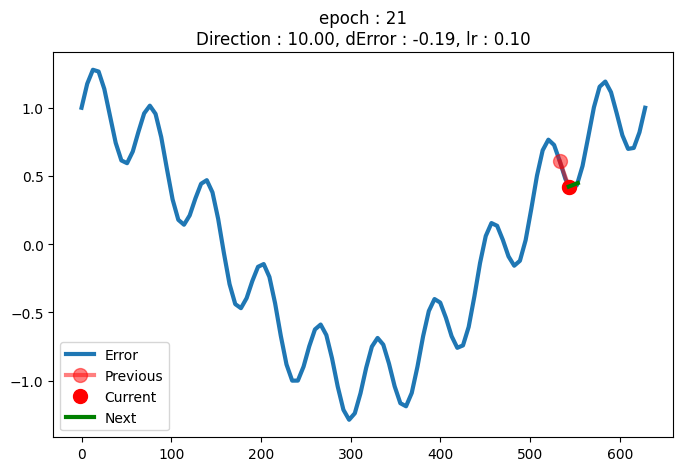

error:  [-0.7444193002909185, -0.025564299510874078, 0.18549699944020231, -0.18549699944020231, 0.025564299510874078, -0.025564299510874078, 0.18549699944020231, -0.18549699944020231, 0.025564299510874078, -0.025564299510874078, 0.18549699944020231, -0.18549699944020231, 0.025564299510874078, -0.025564299510874078, 0.18549699944020231, -0.18549699944020231, 0.025564299510874078, -0.025564299510874078, 0.18549699944020231, -0.18549699944020231]


In [8]:
from IPython import display

error = []
for i in range(20):
    px, py = cx, cy #previous
    cx, cy = nx, ny #current
    d_error = get_error(cy, py)
    error.append(d_error)

    current_direction = get_direction(d_error, px, cx) * learning_rate

    nx = cx + current_direction
    ny = get_y(nx)

    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.plot(x,y)
    plt.plot([px,cx], [py,cy], 'r.-', alpha=0.5)
    plt.plot(cx, cy, 'r.')
    plt.plot([cx,nx], [cy,ny],'g-')
    plt.plot([cx,cx], [cy,cy])
    set_title((i+2), current_direction, d_error, learning_rate)
    plt.legend(['Error', 'Previous', 'Current', 'Next'])
    plt.show(block=False)
    plt.pause(0.5)
print('error: ', error)
